In [19]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]

Здесь будет попытка получить те же параметры для обрезанной выборки

Statistics for data: read data
Data mean is 403173.42907651357
Data median is 9.5922675
Data moda is [8.98]
Data range is 67609309.661269
Data Biased Variance is 22862010778114.184
Data Unbiased Variance is 22938472352622.926
Data start moment is 23024559592027.523
Data center moment is 22862010778114.184
Statistics for data: cutted data
Data mean is 14.988113784232363
Data median is 9.05733
Data moda is [8.98]
Data range is 82.10248299999999
Data Biased Variance is 219.64350046832203
Data Unbiased Variance is 163213965108.8885
Data start moment is 444.28705527741863
Data center moment is 219.64350046832203


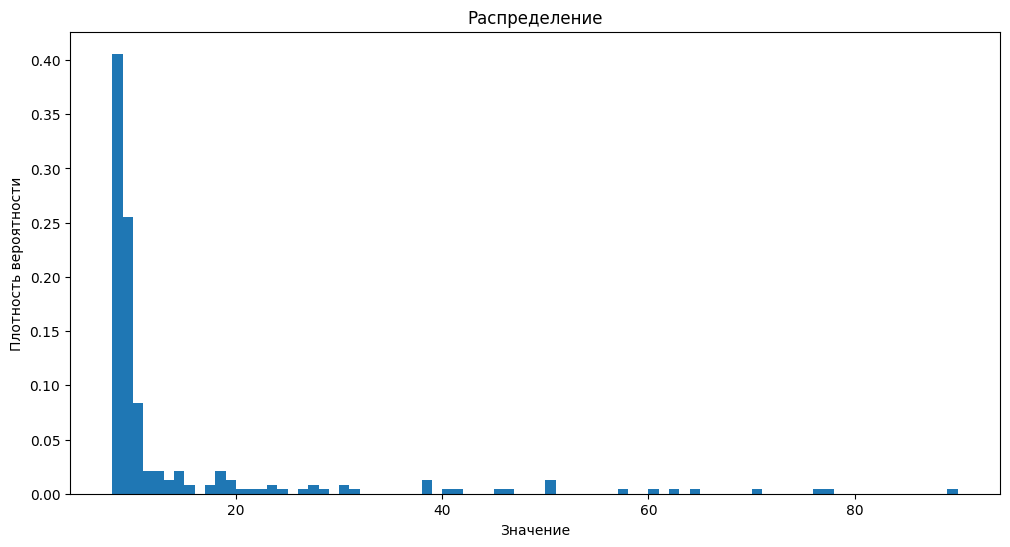

In [20]:
# creating class for Data
class Statistics:
    def __init__(self, data, name):
        self.dataName = name
        self.dataArr = data
        self.dataLen = len(data)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # если количество элементов четное, берем среднее двух средних значений
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # если количество элементов нечетное, берем среднее значение
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # Создаем словарь, где ключи - элементы списка, а значения - количество их повторений
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # Находим элемент(ы) с максимальным количеством повторений
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # Возвращаем моду(ы)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = dataMean(data)
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = dataMean(self.dataArr)
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self, printStats = False, printGraphics = False):
        self.getAllParams()
        print('='*100)
        print(f"Statistics for data: {self.dataName}")

        if printStats:
            print("Data mean is", self.mean)
            print("Data median is", self.median)
            print("Data moda is", self.modes)
            print("Data range is", self.range)
            print("Data Biased Variance is", self.biasedVariance)
            print("Data Unbiased Variance is", self.unbiasedVariance)
            print("Data start moment is", self.dataStartMoment(2))
            print("Data center moment is", self.dataCenterMoment(2))

        if printGraphics:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(self.dataArr, bins=range(int(min(self.dataArr)), int(max(self.dataArr)), 1), density=True)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
        print('='*100)
        

classedOldData = Statistics(data, 'read data')
classedOldData.printAllParams(printStats= True)

right_border = 100
data_cut = [x for x in data if x < right_border]

classedCutData = Statistics(data_cut, 'cutted data')
classedCutData.printAllParams(printStats=True, printGraphics=True)